# Week 1 Challenge Tutorial
### Lyle Lalunio
---
Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone. It can cause a number of symptoms, such as poor ability to tolerate cold, a feeling of tiredness, constipation, depression, and weight gain. Occasionally there may be swelling of the front part of the neck due to goitre. Untreated hypothyroidism during pregnancy can lead to delays in growth and intellectual development in the baby or cretinism.

Worldwide, too little iodine in the diet is the most common cause of hypothyroidism. In countries with enough iodine in the diet, the most common cause of hypothyroidism is the autoimmune condition Hashimoto's thyroiditis. Less common causes include: previous treatment with radioactive iodine, injury to the hypothalamus or the anterior pituitary gland, certain medications, a lack of a functioning thyroid at birth, or previous thyroid surgery. The diagnosis of hypothyroidism, when suspected, can be confirmed with blood tests measuring thyroid-stimulating hormone (TSH) and thyroxine levels.

Worldwide about one billion people are estimated to be iodine deficient; however, it is unknown how often this results in hypothyroidism. In the United States, hypothyroidism occurs in 0.3–0.4% of people.

And that is why we iodize salt.

![alt text](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/39/ds00181_-ds00344_-ds00353_-ds00491_-ds00492_-ds00567_-ds00660_-my00709_im01872_thyroid_gif.jpg)



Background: Doctors all around the world need our help to predict whether a patient has hypothyroid disease. We have already overspent our budget to collect such complete data on about 30 attributes for 2800 patients--a good starting number, but a larger sample would certainly be preferred. Moving forward, however, we simply cannot afford to spend so much money on data collection. Therefore, we also need to determine which attributes are the most meaningful to the predictive models, and cut out the rest that don't contribute much. 

The boss wants to see a **balanced** model that can predict with a **high sensitivity** and **high specificity** while using a ***low amount of features***. Collecting complete data such as this is very rare, very time-consuming, and often very expensive. By minimizing the number of features, it will optimize future data collection by deciding what needs to be collected, and what doesn't.

## Loading the data

Let's read the data into a Pandas dataframe and look at the first 10 records.

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Medlytics2023/Week1/master/Datasets/allhypo.train.data"
dataset = pd.read_csv(url) 
dataset.head(10)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.|3434
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.|1595
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.|1367
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.|1787
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.|2534


In [ ]:
dataset.columns = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source', 'Class']

Great, looks like the data loaded in properly. Let's continue looking at some summary statistics on our data.

## Viewing summary statistics
The functions describe() and info() are your friends

In [ ]:
# output high-level column statistics
dataset.describe()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,compensated hypothyroid.|3103
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,2616,184,2503,297,2505,295,2800,2800,1632,1


In [ ]:
# output information about the data including the index dtype and column dtypes, non-null values and memory usage
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On Thyroxine               2800 non-null   object
 3   Query on Thyroxine         2800 non-null   object
 4   On Antithyroid Medication  2800 non-null   object
 5   Sick                       2800 non-null   object
 6   Pregnant                   2800 non-null   object
 7   Thyroid Surgery            2800 non-null   object
 8   I131 Treatment             2800 non-null   object
 9   Query Hypothyroid          2800 non-null   object
 10  Query Hyperthyroid         2800 non-null   object
 11  Lithium                    2800 non-null   object
 12  Goiter                     2800 non-null   object
 13  Tumor                      2800 non-null   object
 14  Hypopitu

Note the data types are all objects--even columns that are obviously numeric like Age.  This is because there are "?" values for some of the cells, making pandas interpret these columns as non-null objects (instead of int, for example).


## Data cleaning

To start, let's make all the numerical columns contain the correct type of values and change the data type of those columns to numeric. Let's also replace all those question marks with the median of the respective column.

Hint: To make it easier, first try converting all the "?" to NaN.

In [ ]:
import numpy as np

# drop columns that do not contain useful information (all 2800 data points have the same value)
drop_columns = ["TBG", "TBG Measured"]
try:
    dataset=dataset.drop(drop_columns,axis=1)
except:
    print("Can't drop columns {}, they may not exist".format(drop_columns))

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        2800 non-null   object
 1   Sex                        2800 non-null   object
 2   On Thyroxine               2800 non-null   object
 3   Query on Thyroxine         2800 non-null   object
 4   On Antithyroid Medication  2800 non-null   object
 5   Sick                       2800 non-null   object
 6   Pregnant                   2800 non-null   object
 7   Thyroid Surgery            2800 non-null   object
 8   I131 Treatment             2800 non-null   object
 9   Query Hypothyroid          2800 non-null   object
 10  Query Hyperthyroid         2800 non-null   object
 11  Lithium                    2800 non-null   object
 12  Goiter                     2800 non-null   object
 13  Tumor                      2800 non-null   object
 14  Hypopitu

In [ ]:
# convert "?" cells to NaN
dataset[dataset=='?'] = np.nan

In [ ]:
# identify columns by what time of data they hold

numeric_columns = list(["Age","TSH","T3","TT4","T4U","FTI"])

# categorical columns are everything else (minus 'class')
categorical_columns = list(set(dataset.columns)-set(numeric_columns)-set(['Class']))


# convert numeric columns from strings to numbers
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric)

# print statement for sanity check
print('Numerical Columns: ', numeric_columns)
print('Categorical Columns: ', categorical_columns)

dataset.head(10)

Numerical Columns:  ['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
Categorical Columns:  ['Sick', 'TSH Measured', 'Pregnant', 'Thyroid Surgery', 'Referral Source', 'Query on Thyroxine', 'Tumor', 'Query Hyperthyroid', 'Lithium', 'T3 Measured', 'Query Hypothyroid', 'I131 Treatment', 'On Thyroxine', 'Goiter', 'Sex', 'T4U Measured', 'On Antithyroid Medication', 'TT4 Measured', 'Hypopituitary', 'FTI Measured', 'Psych']


,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative.|2807
5,18.0,F,t,f,f,f,f,f,f,f,...,f,NaN,t,183.0,t,1.30,t,141.0,other,negative.|3434
6,59.0,F,f,f,f,f,f,f,f,f,...,f,NaN,t,72.0,t,0.92,t,78.0,other,negative.|1595
7,80.0,F,f,f,f,f,f,f,f,f,...,t,0.6,t,80.0,t,0.70,t,115.0,SVI,negative.|1367
8,66.0,F,f,f,f,f,f,f,f,f,...,t,2.2,t,123.0,t,0.93,t,132.0,SVI,negative.|1787
9,68.0,M,f,f,f,f,f,f,f,f,...,t,1.6,t,83.0,t,0.89,t,93.0,SVI,negative.|2534


Perfect!  Now let's see what's going on with the "class" column.... According to the note the data collectors included with this data, the ".|####" refers to a patient number, and is not necessarily relevant for our purposes here.  Let's turn the "class" column into a useful multi-class label.

In [ ]:
# import regular expression package


import re  

# define the regular expression for the ".|####" part of dataset['class']

regex_pattern = ( "\."   # looks for the period...
                  "\|"   # followed by a pipe...
                  "\d+") # followed by one or more digit

for index, row in dataset.iterrows():
    
    # substitute instances of our regex_pattern for an empty string
    new_class = re.sub(regex_pattern, '', row['Class'])
    dataset.loc[index,'Class']=new_class

dataset.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative


Let's run the describe() function on just the "class" column.

In [ ]:
dataset['Class'].describe()

count         2800
unique           4
top       negative
freq          2580
Name: Class, dtype: object

It looks like there are actually 4 unique classification variables! Thank goodness we didn't assume it was binary.



In [ ]:
# Display all the unique values in the class column.
dataset['Class'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

But let's make it binary for the sake of this example.  If you finish early later on, try the multiclass classifier with all 4 values!

In [ ]:
# Change all non-negative classes to the positive class



dataset['Class'] = dataset['Class'].replace('negative', 0)                    
dataset['Class'] = dataset['Class'].replace('compensated hypothyroid', 1)     
dataset['Class'] = dataset['Class'].replace('primary hypothyroid', 1)         
dataset['Class'] = dataset['Class'].replace('secondary hypothyroid', 1)

dataset.head(10)

dataset2=dataset

Great! Let's see if there's any other records we have to address. count() is a nice way to check if we have any other missing values.

In [ ]:
dataset.count()

Age                          2799
Sex                          2690
On Thyroxine                 2800
Query on Thyroxine           2800
On Antithyroid Medication    2800
Sick                         2800
Pregnant                     2800
Thyroid Surgery              2800
I131 Treatment               2800
Query Hypothyroid            2800
Query Hyperthyroid           2800
Lithium                      2800
Goiter                       2800
Tumor                        2800
Hypopituitary                2800
Psych                        2800
TSH Measured                 2800
TSH                          2516
T3 Measured                  2800
T3                           2215
TT4 Measured                 2800
TT4                          2616
T4U Measured                 2800
T4U                          2503
FTI Measured                 2800
FTI                          2505
Referral Source              2800
Class                        2800
dtype: int64

There seems to be quite a few rows with missing data.  There are techniques you can use to try to handle this situation (and some models in sklearn can handle NaN values without problem).  But let's just remove those rows for now.

In [ ]:

# convert categorical columns to indicator (0,1) variables
for col in categorical_columns:
    dataset2[col] = pd.get_dummies(dataset2[col],drop_first=True)
    
dataset2.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,41.0,0,0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,1,0
1,23.0,0,0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,NaN,0,NaN,0,0
2,46.0,1,0,0,0,0,0,0,0,0,...,0,NaN,1,109.0,1,0.91,1,120.0,0,0
3,70.0,0,1,0,0,0,0,0,0,0,...,1,1.9,1,175.0,0,NaN,0,NaN,0,0
4,70.0,0,0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,0


In [ ]:

#normalizing data for knn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset3 = pd.DataFrame(scaler.fit_transform(dataset2), columns = dataset2.columns)
dataset3.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,0.088106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.232227,1.0,0.287383,1.0,0.458564,1.0,0.272265,1.0,0.0
1,0.048458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.184834,1.0,0.233645,0.0,NaN,0.0,NaN,0.0,0.0
2,0.099119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,1.0,0.250000,1.0,0.331492,1.0,0.300254,0.0,0.0
3,0.151982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.175355,1.0,0.404206,0.0,NaN,0.0,NaN,0.0,0.0
4,0.151982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.109005,1.0,0.137850,1.0,0.309392,1.0,0.173028,0.0,0.0


In [ ]:


#kNN imputation
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5)
dataset4 = pd.DataFrame(imputer.fit_transform(dataset3),columns = dataset3.columns)

In [ ]:
dataset4.head(20)

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
0,0.088106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.232227,1.0,0.287383,1.0,0.458564,1.0,0.272265,1.0,0.0
1,0.048458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.184834,1.0,0.233645,0.0,0.427624,0.0,0.241730,0.0,0.0
2,0.099119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.175355,1.0,0.250000,1.0,0.331492,1.0,0.300254,0.0,0.0
3,0.151982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.175355,1.0,0.404206,0.0,0.440884,0.0,0.394402,0.0,0.0
4,0.151982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.109005,1.0,0.137850,1.0,0.309392,1.0,0.173028,0.0,0.0
5,0.037445,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.253081,1.0,0.422897,1.0,0.546961,1.0,0.353690,0.0,0.0
6,0.127753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.190521,1.0,0.163551,1.0,0.337017,1.0,0.193384,0.0,0.0
7,0.174009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.052133,1.0,0.182243,1.0,0.215470,1.0,0.287532,0.0,0.0
8,0.143172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.203791,1.0,0.282710,1.0,0.342541,1.0,0.330789,0.0,0.0
9,0.147577,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.146919,1.0,0.189252,1.0,0.320442,1.0,0.231552,0.0,0.0


In [ ]:
dataset4.count()

Age                          2800
Sex                          2800
On Thyroxine                 2800
Query on Thyroxine           2800
On Antithyroid Medication    2800
Sick                         2800
Pregnant                     2800
Thyroid Surgery              2800
I131 Treatment               2800
Query Hypothyroid            2800
Query Hyperthyroid           2800
Lithium                      2800
Goiter                       2800
Tumor                        2800
Hypopituitary                2800
Psych                        2800
TSH Measured                 2800
TSH                          2800
T3 Measured                  2800
T3                           2800
TT4 Measured                 2800
TT4                          2800
T4U Measured                 2800
T4U                          2800
FTI Measured                 2800
FTI                          2800
Referral Source              2800
Class                        2800
dtype: int64

<AxesSubplot: >

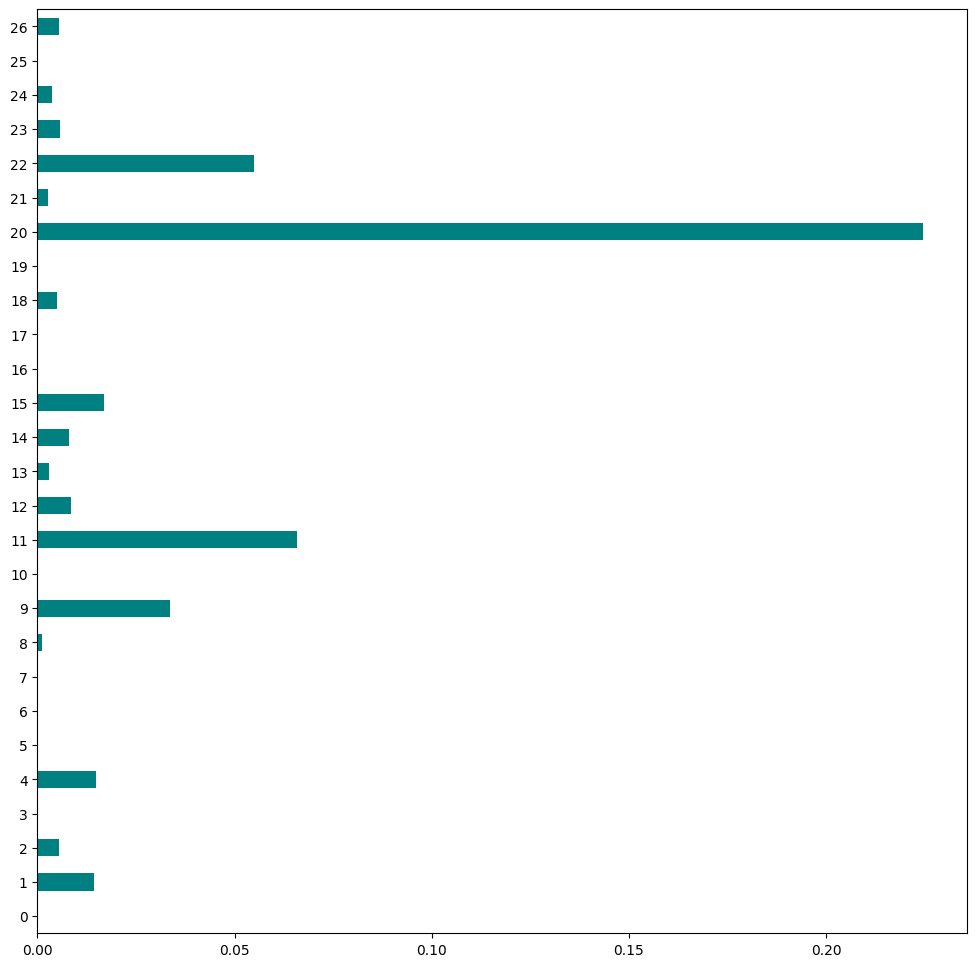

In [ ]:
##feature selection
from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
%matplotlib inline

X=dataset4[set(dataset4.columns)-set(['Class'])]
y=dataset4['Class']

importances = mutual_info_classif(X, y)
plot_importances = pd.Series(importances)
plot_importances.plot(kind = "barh", color = "teal", figsize =(12,12))

In [ ]:
X['Referral Source'].value_counts()

0.0    2525
1.0     275
Name: Referral Source, dtype: int64

Ooof!  We just cut out about 30% of our data set!  You probably won't want to throw out this data for your project, but let's keep going now that we have a clean dataset and do some further data analysis and visualization to better understand what we're working with.

## Data analysis and visualization

As the name suggests, [pandas.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) will compute pairwise correlation of (numerical) columns, excluding NA/null values. Notice that in this case, since we've converted 'class' to a number (0 or 1) we can see how correlated different features are with the class label!

In [ ]:
dataset4.corr()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Referral Source,Class
Age,1.000000,-0.005721,0.004579,-0.015858,-0.069304,0.081530,-0.109113,-0.032321,0.054435,0.023965,...,0.073785,-0.245504,0.064434,-0.048197,0.086121,-0.159311,0.085031,0.047137,-0.107205,-0.013872
Sex,-0.005721,1.000000,-0.082493,0.043805,-0.031405,0.004839,-0.081164,-0.039495,-0.028288,-0.029970,...,0.088892,-0.074501,0.076595,-0.157694,0.048326,-0.236411,0.049443,-0.032338,0.157479,-0.041927
On Thyroxine,0.004579,-0.082493,1.000000,0.002667,-0.000072,-0.051109,0.010769,0.041619,0.079724,0.074691,...,-0.155443,0.028758,0.016476,0.221759,0.025192,0.052086,0.024417,0.199455,-0.090852,-0.086153
Query on Thyroxine,-0.015858,0.043805,0.002667,1.000000,-0.013347,0.022131,0.035436,0.011373,-0.015899,-0.029931,...,-0.034371,-0.029203,0.031928,-0.013388,0.031695,-0.014592,0.031510,-0.004022,-0.039729,-0.001598
On Antithyroid Medication,-0.069304,-0.031405,-0.000072,-0.013347,1.000000,-0.022420,0.067926,-0.013177,0.010479,-0.013638,...,0.008852,0.072730,-0.036398,0.003162,-0.035937,0.066768,-0.036302,-0.043689,-0.036589,-0.020256
Sick,0.081530,0.004839,-0.051109,0.022131,-0.022420,1.000000,-0.024651,-0.024034,-0.026706,0.036088,...,0.027051,-0.084866,0.001696,-0.033629,0.015927,-0.044034,0.015504,-0.012115,-0.060558,0.016105
Pregnant,-0.109113,-0.081164,0.010769,0.035436,0.067926,-0.024651,1.000000,-0.014488,-0.016100,-0.017610,...,0.026080,0.206871,0.032330,0.191543,0.041992,0.357541,0.041833,-0.010352,-0.030240,-0.035597
Thyroid Surgery,-0.032321,-0.039495,0.041619,0.011373,-0.013177,-0.024034,-0.014488,1.000000,-0.015696,-0.016534,...,-0.013881,-0.032263,0.031520,-0.030763,0.001354,0.022187,0.001081,-0.037587,-0.039222,-0.012054
I131 Treatment,0.054435,-0.028288,0.079724,-0.015899,0.010479,-0.026706,-0.016100,-0.015696,1.000000,0.049420,...,0.000193,0.007294,0.035026,-0.011771,0.027623,0.009777,0.027398,-0.015188,-0.043584,0.012563
Query Hypothyroid,0.023965,-0.029970,0.074691,-0.029931,-0.013638,0.036088,-0.017610,-0.016534,0.049420,1.000000,...,-0.074829,-0.061646,0.016691,-0.011309,0.006388,0.009351,0.005829,-0.025712,-0.051298,0.074787


Let's do some further visual analysis using a new module called seaborn. Explore its incredible versatility and diversity with data visualization here: https://seaborn.pydata.org/

<AxesSubplot: >

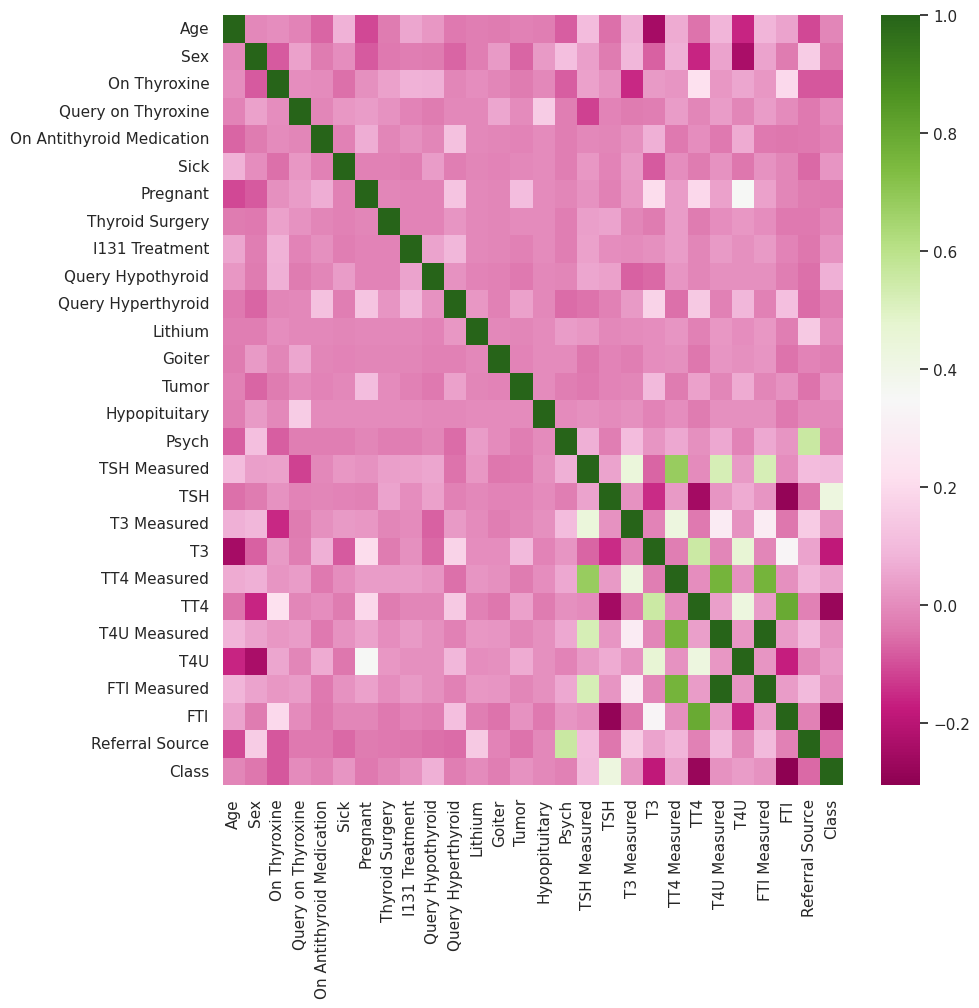

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 10)}) # Bigger figures
sns.heatmap(dataset4.corr(), annot=False, cmap="PiYG")

OK! I think we're ready to create and select some supervised learning models. To get the ball rolling, select Age and Sex as our explanatory features (and class as the target feature, obviously).

Now let's take a look at our categorical columns!

Uh oh... we have several features that are non-informative (they only have a single value).  We probably didn't notice this before because there were still '?' values in there, or perhaps when we threw out that 30% of our data we got rid of some variation in these features.  Let's just drop those columns.

We can convert categorical columns (i.e., True/False or Male/Female) into indicator values (0,1) using a pretty nifty feature: [pandas.get_dummies()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.get_dummies.html).  

## Model training and selection

In [ ]:
dataset4['Class'].value_counts()
#class imbalance

0.0    2580
1.0     220
Name: Class, dtype: int64

weight for positive: 1/220

weight for negative: 1/2580

In [ ]:
from sklearn.model_selection import train_test_split

#features = set(dataset4.columns) - set(["Class"])
features = ["Age", "TSH", "FTI", "TT4"]

data_train, data_val = train_test_split(dataset4, test_size=0.20, random_state=5, stratify=dataset4['Class'])

X_train = data_train[features]
X_val = data_val[features]

y_train = data_train['Class']
y_val = data_val['Class']


In [ ]:
# grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth' : [4,5,6,7,8],
    'min_samples_leaf':[1,2,3, 4, 5]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_

Training Accuracy is  98.79464285714286
Validation Accuracy is  98.03571428571428
[[2037   27]
 [   0  176]]
[[507   9]
 [  2  42]]
AUC:  0.9919837914023961
Age
Feature: 0, Score: 0.02779
TSH
Feature: 1, Score: 0.77487
FTI
Feature: 2, Score: 0.11784
TT4
Feature: 3, Score: 0.07950


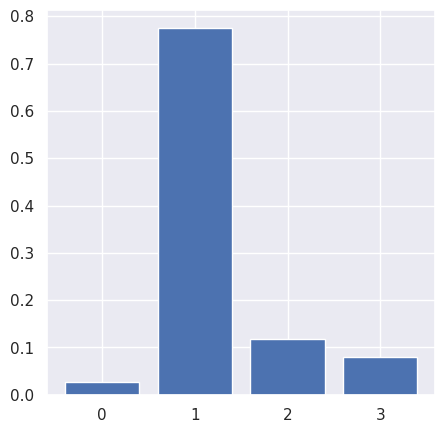

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=5, max_depth=7, min_samples_leaf=2)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

predict_val = random_forest.predict_proba(X_val)
predict = []
for x in predict_val:
    if x[1] > 0.4:
        predict.append(1)
    else:
        predict.append(0)


# Printing accuracy of testing & training data
y_train_pred = random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred = random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,predict)*100)


cm1 = metrics.confusion_matrix(y_train, y_train_pred)
cm2 = metrics.confusion_matrix(y_val, predict)
print(cm1)
print(cm2)

y_val_proba = random_forest.predict_proba(X_val)
fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

f = list(features)
# get importance
importance = random_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(features[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (5,5))
plt.bar(range(len(importance)), importance)
plt.show()

In [ ]:
p = random_forest.predict_proba(X_val)
print

In [ ]:
h = pd.DataFrame(y_val_proba)
h.head(40)

In [ ]:
labels=[0,1]

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure(figsize=(2,2))
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()

plot_cmatrix(cm1,labels)
plot_cmatrix(cm2,labels)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print("Training Accuracy is ", accuracy_score(y_train,y_train_pred)*100)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

cm1 = metrics.confusion_matrix(y_train, y_train_pred)
cm2 = metrics.confusion_matrix(y_val, y_val_pred)
print(cm1)
print(cm2)

y_val_prob = svm.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC is ", roc_auc)


X=dataset4.filter(set(dataset4.columns) - set(['Class']), axis=1)
y=dataset4.filter(['Class'], axis=1)

importances = mutual_info_classif(X, y)
plot_importances = pd.Series(importances)
plt.figure(figsize = (5,5))

#plt.bar(range(27), plot_importances)
#plt.show()


labels=[0,1]

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure(figsize=(2,2))
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()

plot_cmatrix(cm1,labels)
plot_cmatrix(cm2,labels)


In [ ]:
#svm model
from sklearn import svm
from sklearn.svm import SVC

svm = SVC(gamma=1, C=10, kernel='rbf', probability=True)
svm.fit(X_train,y_train)
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
cm1 = metrics.confusion_matrix(y_train, y_train_pred)
cm2 = metrics.confusion_matrix(y_val, y_val_pred)
print(cm1)
print(cm2)
labels = [0,1]
y_val_prob = svm.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC is ", roc_auc)

# get importance


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
print(accuracy_score(y_train, y_train_pred)*100)
y_val_pred = knn.predict(X_val)
print(accuracy_score(y_val, y_val_pred)*100)
cm1 = metrics.confusion_matrix(y_train, y_train_pred)
cm2 = metrics.confusion_matrix(y_val, y_val_pred)
print(cm1)
print(cm2)
from sklearn import metrics
y_val_proba = knn.predict_proba(X_val)

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)


Let's train a decision tree model on our training data!

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc

# define the model
dt_model = DecisionTreeClassifier(random_state = 0)

# fit the model to training data 
dt_model.fit(X_train, y_train)

# apply the model to test data
y_val_predict = dt_model.predict(X_val)
y_val_proba = dt_model.predict_proba(X_val)

y_train_pred=dt_model.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=dt_model.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

cm1 = metrics.confusion_matrix(y_train, y_train_pred)
cm2 = metrics.confusion_matrix(y_val, y_val_pred)
print(cm1)
print(cm2)
from sklearn import metrics
y_val_proba = knn.predict_proba(X_val)
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

X=dataset4.filter(['TSH', 'T3', 'TT4', 'FTI'], axis=1)
y=dataset4.filter(['Class'], axis=1)

# get importance
importance = dt_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
imputer

In [ ]:
imputer

Fantastic, we have just built a decision tree model! Let's go see how well it performs.

# Scoring Metrics

## 1. Confusion Matrix Metric
You will receive a certain number of points for each correct classification and a certain point penalty for each incorrect classification. The points are weighted, and are designed to equate to -1 in a Zero Rule baseline model. This point scheme is even more pessimistic than the F1 score, designed to punish you heavily for predicting false positives (FP) and false negatives (FN)--FN cases especially. In doing so, we hope you see the importance of clinical considerations and treat your models from a more human perspective, rather than detached from it.



In [ ]:
from sklearn.metrics import confusion_matrix

# This is exctly the first metric you'll be evaluated on!
# Note: this will only work on the binary case -- let us know if you get to the multi-class case

cm = confusion_matrix(y_true, y_val_predict)
    print(cm)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm,np.array([[1, -4], [-4, 1]]))))



def cm_metric(y_true, y_prob):
    
    # predict the class with the greatest probability
    y_val_predict = [np.argmax(y) for y in y_prob]

    # calculate the confusion matrix
    cm = confusion_matrix(y_true, y_val_predict)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return sum(sum(np.multiply(cm_norm, np.array([[1, -2], [-2, 1]]))))

cm_metric(y_val, y_val_proba)

IndentationError: unexpected indent (800652617.py, line 7)

As we can see, the decision tree is just classifying everything as class 0...  Pretty terrible.   =(  Well maybe there's a threshold where this doesn't happen.  Let's look at the AUC

## 2. Area Under ROC Curve
A receiver operating characteristic (ROC) curve plots the true positive rate (y) against the false positive rate (x) at many decision threshold settings (output < threshold = 0, output > threshold = 1). The area under this curve represents the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

In [ ]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC: ',roc_auc)

AUC:  0.9919837914023961


Yikes... that's still pretty bad.  Not unexpected, though, since we're only using 2 features!  Let's take a look at the ROC.

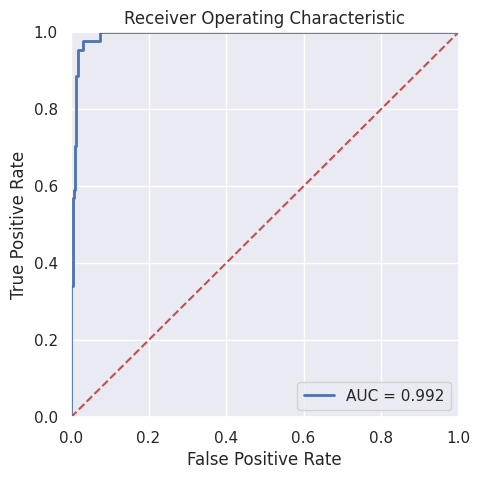

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',linewidth=2, label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Well, look on the bright side... at least there's lots of room for improvement!  Try using more features, different models, and see if you can do anything about that 30% of the data we threw out earlier.

## 3. Economic Cost
Similar to the confusion matrix, we want you to keep in mind the other aspects of healthcare analytics--in this case, economic feasibility. In essence, we want you to minimize the amount of time and money spent on data collection by **reducing the number of features** collected. Each record certainly required a lot of time and money from several individuals and businesses to reliably create, and we hope you gain a better understanding of conducting a useful cost-benefit analysis with this scoring method.  This won't be evaluated quantitatively, but please consider discussing it for your presentation.

In conclusion, it looks like this model performed pretty bad. It's probably best to try out different columns or perhaps use a different model before we submit our model for scoring.

# Submitting your Model

In [ ]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/Medlytics2023/Week1/master/Datasets/allhypo.test.csv"
test_data = pd.read_csv(url) 
test_data.head(10)
test_data.columns = ['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine', 'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery', 'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium', 'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG', 'Referral Source']
# drop columns that do not contain useful information (all 2800 data points have the same value)
drop_columns = ["TBG", "TBG Measured"]
test_data=test_data.drop(drop_columns,axis=1)

test_data.head()

In [ ]:
test_data[test_data=='?'] = np.nan

numeric_columns = list(["Age","TSH","T3","TT4","T4U","FTI"])

# categorical columns are everything else (minus 'class')
categorical_columns = list(set(test_data.columns)-set(numeric_columns))

# convert numeric columns from strings to numbers
test_data[numeric_columns] = test_data[numeric_columns].apply(pd.to_numeric)

# convert categorical columns to indicator (0,1) variables
for col in categorical_columns:
    #print(col)
    test_data[col] = pd.get_dummies(test_data[col])

#normalizing data for knn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_data2 = pd.DataFrame(scaler.fit_transform(test_data), columns = test_data.columns)

#kNN imputation
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=5)
test_data3 = pd.DataFrame(imputer.fit_transform(test_data2),columns = test_data2.columns)

I THINK ITS FIXED!!!!!!!!!!!! YAYA YAYAYAY

In [ ]:
test_data3.info()

In [ ]:
test_x_val = test_data3[features]

predict_val = random_forest.predict_proba(test_x_val)
predict = []
for x in predict_val:
    if x[1] > 0.4:
        predict.append(1)
    else:
        predict.append(0)

Once you believe to have found the best classifier, run your classifier on the test data and make a pickle file containing your predictions contained a pandas dataframe.  This pandas dataframe will contain 2 columns for your binary classifier (or 4 columns for the multiclass classifier) that looks like this (*pay attention to the column names!*):

|   | 0 | 1   |
|---|---|------|
| 0 | $p_{0,0}$ | $p_{0,1}$|
| 1 | $p_{1,0}$ | $p_{1,1}$|
| 2 | $p_{2,0}$ | $p_{2,1}$|
| ... | ... | ...|
| N | $p_{N,0}$ | $p_{N,1}$|

where $p_{i,j}$ corresponds to the probability of data point $i$ belonging to class $j$.

In [ ]:
# NOTE!!! For the actual challenge, you will use your TEST predictions.  Here we are just using the validation predictions.
c = ['prediction']
pick = pd.DataFrame(predict, columns=c)
pick['proba_x'] = predict_val[:, 0]
pick['proba_y'] = predict_val[:, 1]
pick.head(970)

In [ ]:
# after running this cell, you should see the pickle file pop up in the file explorer to the left
# use the three dots next to the filename to download the file
# after downloading the pickle file, email it to medlytics23-staff@mit.edu
import pickle


# create a pickle file (this will save to the Google cloud)
prediction_pickle_path = 'team1_binary.pkl'
prediction_pickle = open(prediction_pickle_path, 'wb')
pickle.dump(pick, prediction_pickle)

prediction_pickle.close()

# Presenting Your Model

Finally, we would like you to be able to present your model to the class. This will be done on the Friday of each week. The format in which you present is completely up to your group, but a good way to go about it is to take the rest of the class through the notebook where your model's code is stored. You should also specifically talk about the following components of your project:

* Features Chosen: a list of the features used in your model, and an explanation of how you chose them.
* Type of Model: an explanation of the model type, parameters used, and why.
* Evaluation: at least one plot showing an evaluation of your model against a validation set. You can use a confusion matrix, AUROC, or another metric of your choice.

Feel free to include one or two additional plots that describe your process and/or model if you think that would be helpful.

# Moving to the Next Level

For those that finish early, remember how I converted the class values into simply "negative" and "positive"? Now try tackling the multiclass classifier (predicting the different types of positive hypothyroid cases instead of simply negative or positive)! 

The same rules apply!  (Note: for the multiclass problem, the AUC calculation will be the micro-average over your classes.)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=869cb343-c8bb-49e3-9727-f69c58b5c8c7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>